# Propagation of Hole waveguide (Antiguide)

Empty hole in glass. N0 configuration in Bird


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real, plotlogf_imag
from scipy.optimize import newton
from scipy.integrate import quad
import json
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-6, ts=[2e-6, 2e-6,2e-6],
              ns=[1.44, 1, 1.44], xrefs=[300, 500, 300],
              symmetric=True, wl=1e-6)

In [3]:
def quadratic_piecewise(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: .25-x**2, 0]
    return np.piecewise(x, conds, funcs)
    
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

In [4]:
# Set input function
f0 = quadratic_piecewise
f0_shifted = lambda x: f0(x) + 1
# Set input field type
field_type = 'TE'

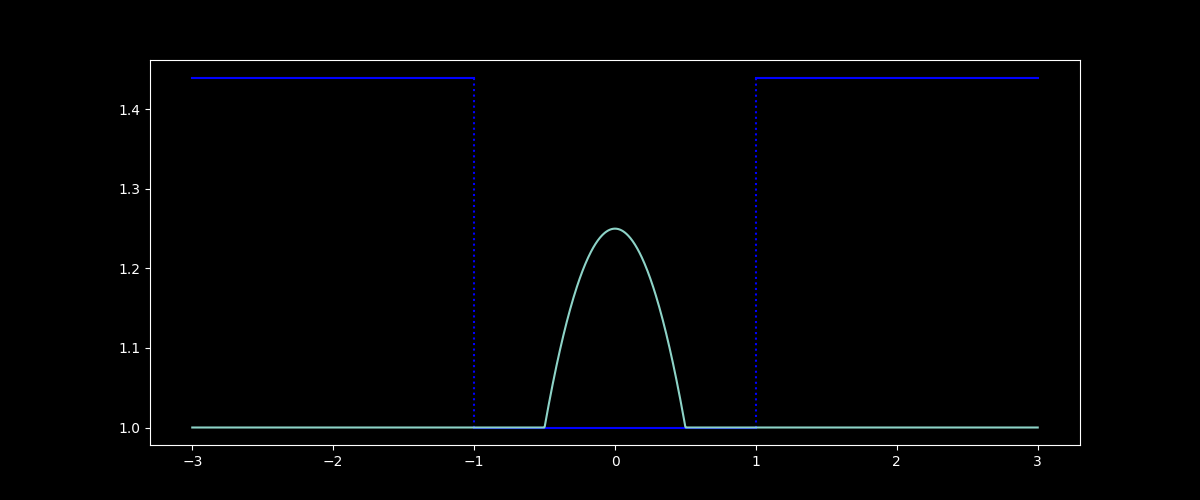

In [5]:
A.plot_refractive_index()
ax = plt.gca()
A.add_1d_plot(ax, f0_shifted)

In [6]:
Propagator_Class = A.propagator()

# Check for guided modes

Doesn't seem like it should have any

In [7]:
mode_type = 'guided'


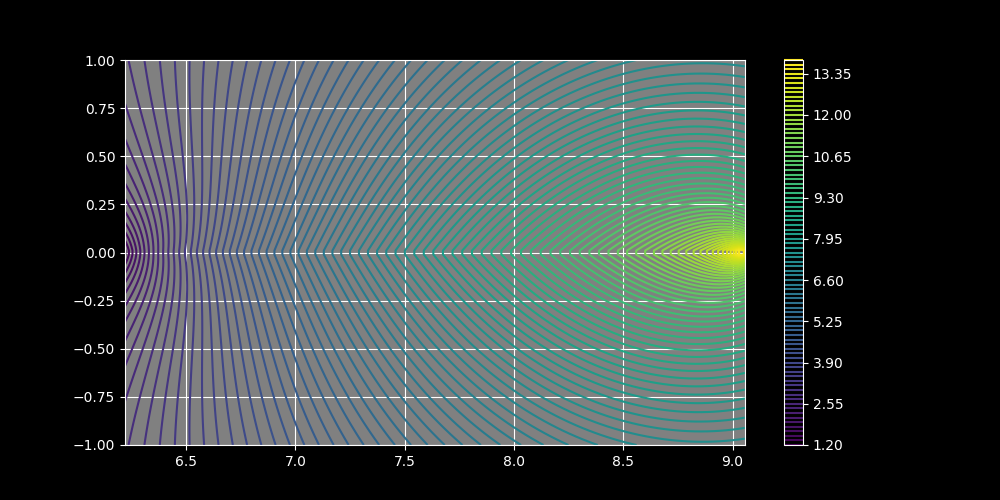

In [8]:
plotlogf(A.determinant, .99*A.K_low, 1.001*A.K_high, -1,1, field_type, mode_type,
         figsize=(10,5),iref=100, rref=100,levels=100)

No guided modes.

## Leaky Modes

In [9]:
mode_type = 'leaky'


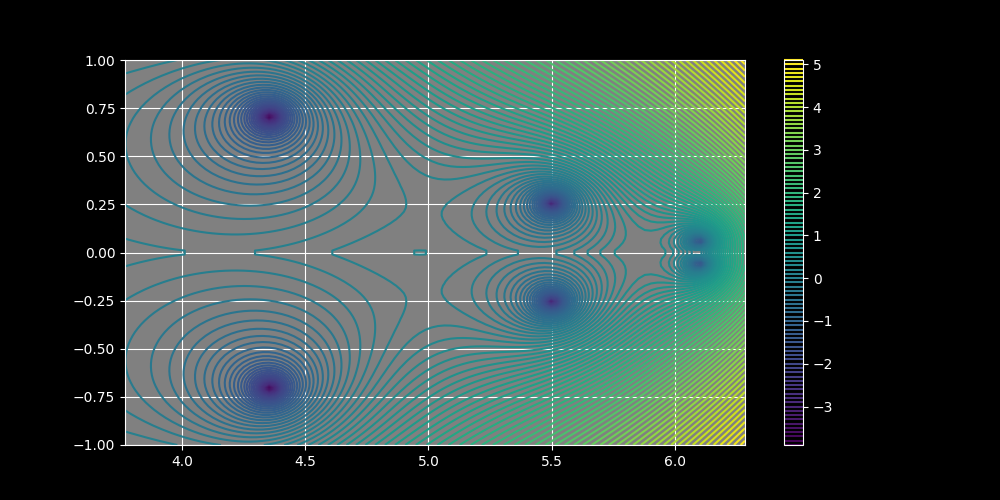

In [10]:
plotlogf(A.determinant, .6*A.K_low, 1.00001*A.K_low, -1,1, field_type, mode_type,
         figsize=(10,5),iref=100, rref=100,levels=100)

In [11]:
beta1 = newton(A.determinant, 6.15, args=(field_type, mode_type))

In [12]:
Fs1 = A.fields(beta1, field_type=field_type, mode_type=mode_type)


In [13]:
xs = np.linspace(-10,10,600)

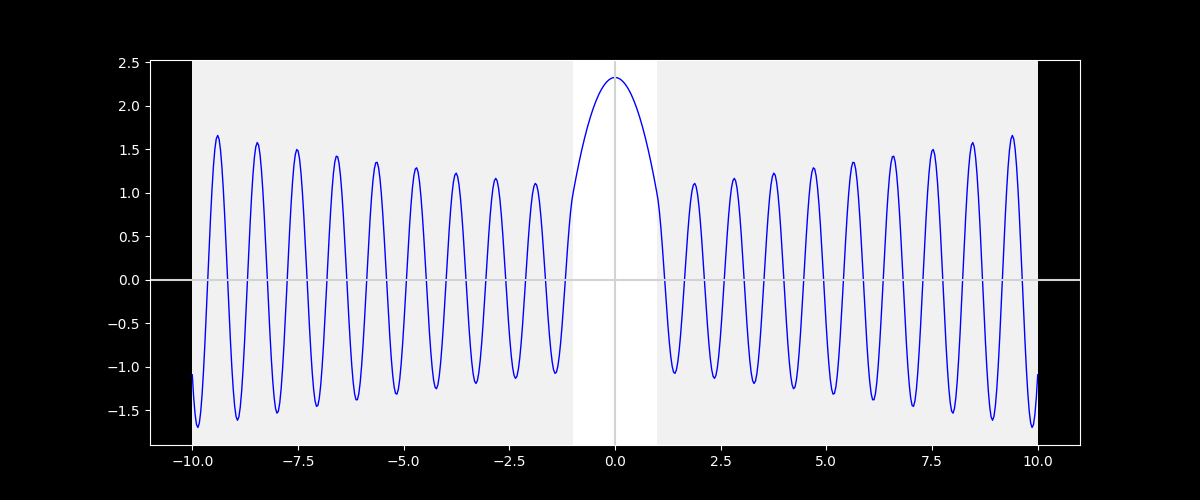

In [14]:
A.plot_field_1d(Fs1, xs=xs, part='real',
                linewidth=1, color='b', plot_regions=True, 
                hatch=None, plot_Rhos=False)

(-10.0, 10.0, 0.0, 10.0)

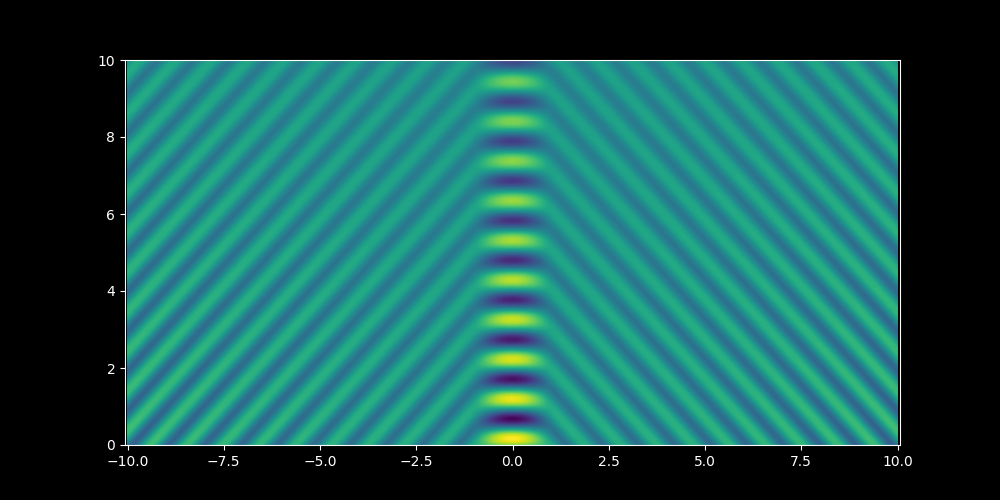

In [15]:
A.plot_field_2d(Fs1, xs=xs, zmin=0, zmax=10, zref=500, colorbar=False, figsize=(10,5))
plt.axis('equal')

In [16]:
xs = np.linspace(-12,12, 1000)

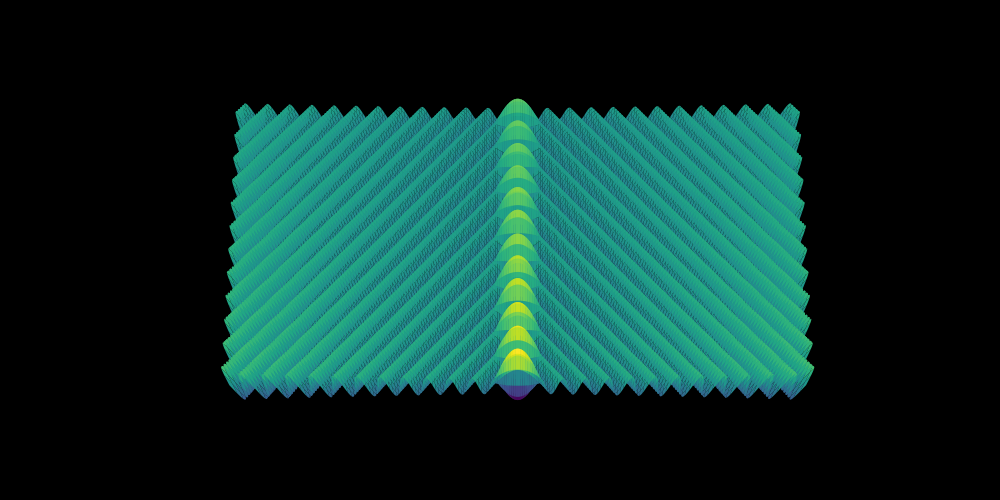

In [17]:
A.plot_field_2d(Fs1, xs=xs, zmin=0, zmax=12, zref=500, colorbar=False, figsize=(10,5), surface=True,
               rstride=4, cstride=4)


# Propagation of input



In [11]:
A.Z_hyperbolic, A.Z_evanescent

(6.5103017702744115, (9.047786842338605+0j))

In [62]:
P1 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5,
                      LZ=0.001, RZ=6, NZ=200,
                      field_type=field_type,
                      paper_method=False, sign='+1')


 97% (195 of 200) |##################### | Elapsed Time: 0:00:01 ETA:   0:00:00

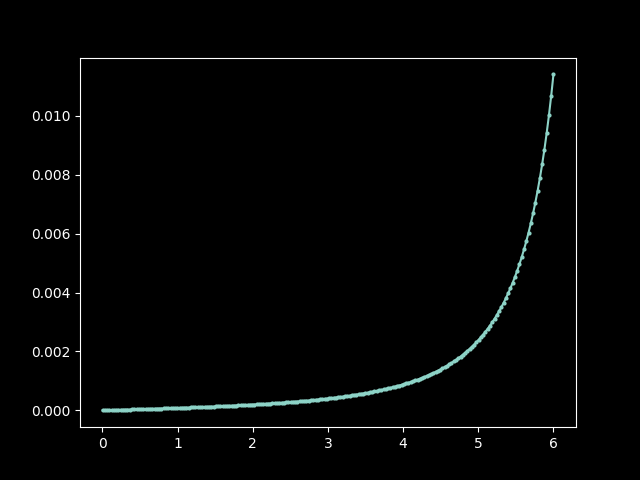

In [63]:
plt.close('all')
plt.plot(P1.Zs, np.abs(P1.alphas.real), marker='o', markersize=2)

In [60]:
P2 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                      LZ=6, RZ=7, NZ=300, 
                      field_type=field_type,
                      paper_method=False, sign='+1')

 97% (293 of 300) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

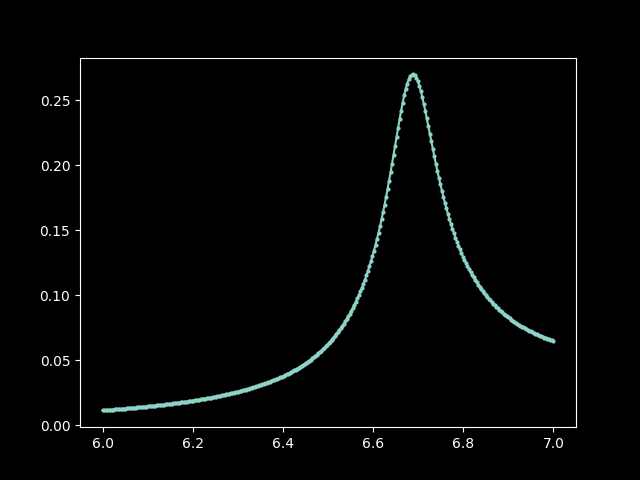

In [61]:
plt.close('all')
plt.plot(P2.Zs, np.abs(P2.alphas.real), marker='o', markersize=2)

In [27]:
P3 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                      LZ=7, RZ=A.Z_evanescent.real, NZ=100, 
                      field_type=field_type,
                      paper_method=False, sign='+1')

 97% (97 of 100) |###################### | Elapsed Time: 0:00:00 ETA:   0:00:00

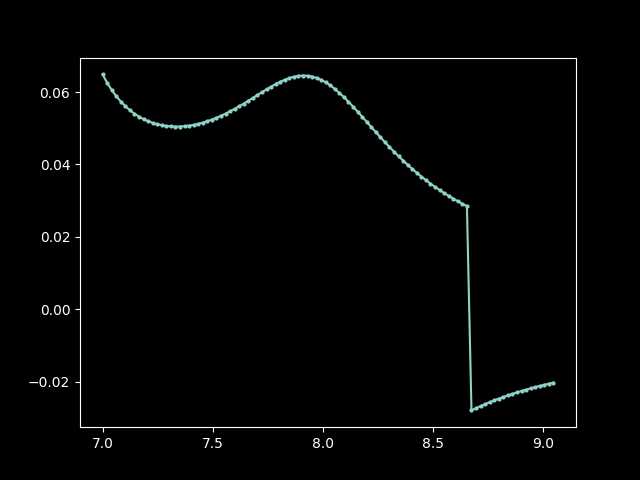

In [28]:
plt.close('all')
plt.plot(P3.Zs, P3.alphas.real, marker='o', markersize=2)

In [18]:
P4 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                      LZ=A.Z_evanescent.real, RZ=14, NZ=100, 
                      field_type=field_type,
                      paper_method=False, sign='+1')

 92% (92 of 100) |#####################  | Elapsed Time: 0:00:00 ETA:   0:00:00

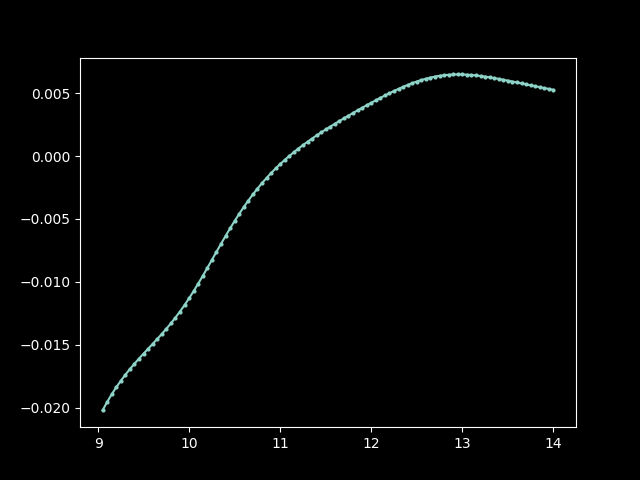

In [19]:
plt.close('all')
plt.plot(P4.Zs, P4.alphas.real, marker='o', markersize=2)

In [48]:
P5 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                      LZ=14, RZ=20, NZ=200, 
                      field_type=field_type,
                      paper_method=False, sign='+1')

 99% (198 of 200) |##################### | Elapsed Time: 0:00:02 ETA:   0:00:00

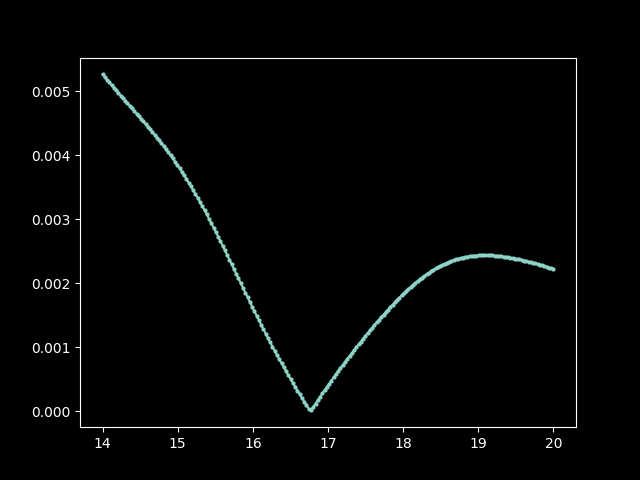

In [49]:
plt.close('all')
plt.plot(P5.Zs, np.abs(P5.alphas.real), marker='o', markersize=2)

In [50]:
P6 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                      LZ=20, RZ=50, NZ=200, 
                      field_type=field_type,
                      paper_method=False, sign='+1')

 99% (198 of 200) |##################### | Elapsed Time: 0:00:04 ETA:   0:00:00

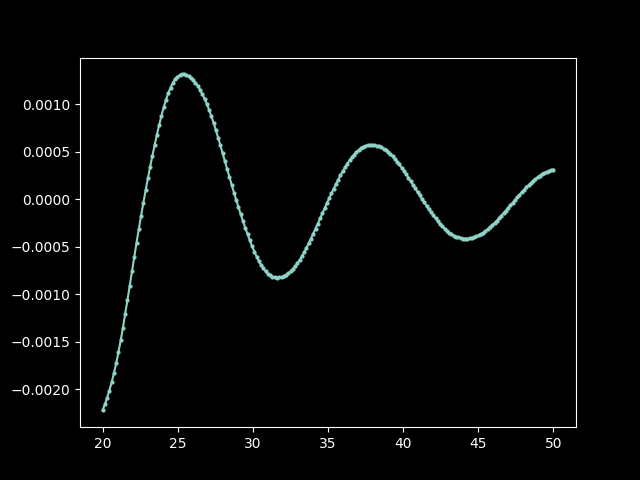

In [51]:
plt.close('all')
plt.plot(P6.Zs, P6.alphas.real, marker='o', markersize=2)

In [55]:
P7 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                      LZ=50, RZ=100, NZ=200, 
                      field_type=field_type,
                      paper_method=False, sign='+1')

 99% (198 of 200) |##################### | Elapsed Time: 0:00:09 ETA:   0:00:00

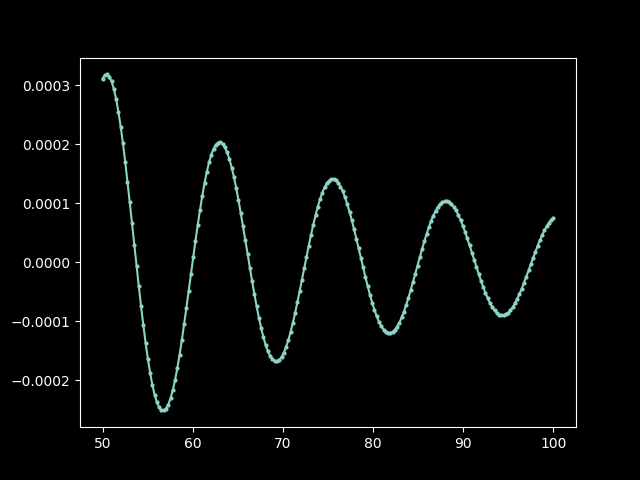

In [56]:
plt.close('all')
plt.plot(P7.Zs, P7.alphas.real, marker='o', markersize=2)

In [41]:
P8 = Propagator_Class(f0=f0, Lx=-.5, Rx=.5, 
                      LZ=100, RZ=150, NZ=100, 
                      field_type=field_type,
                      paper_method=False, sign='+1')

 99% (99 of 100) |###################### | Elapsed Time: 0:00:07 ETA:   0:00:00

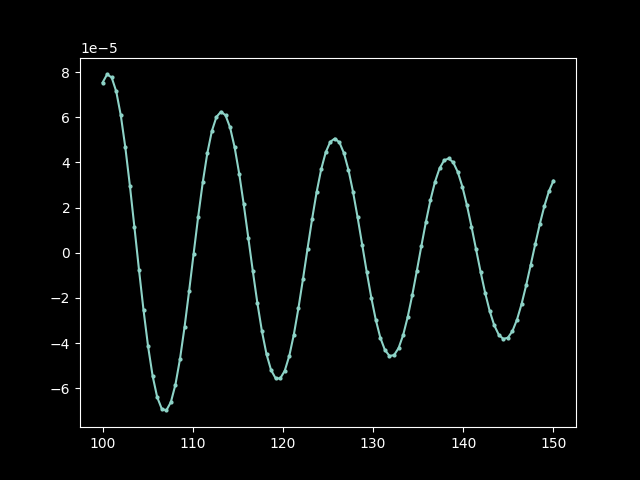

In [42]:
plt.close('all')
plt.plot(P8.Zs, P8.alphas.real, marker='o', markersize=2)

### Combine propagators into one function

In [64]:
Ps = [P1, P2, P3, P4, P5, P6, P7, P8]
portion = 'full'

full = lambda x: sum([P.slice_propagate(x, portion=portion) for P in Ps])
Full = lambda x, z : sum([P.propagate(x, zs=z, portion=portion) for P in Ps])

diff = lambda x: full(x) - f0(x)

# 1D Plot


In [65]:
xs = np.linspace(-6, 6, 1200)


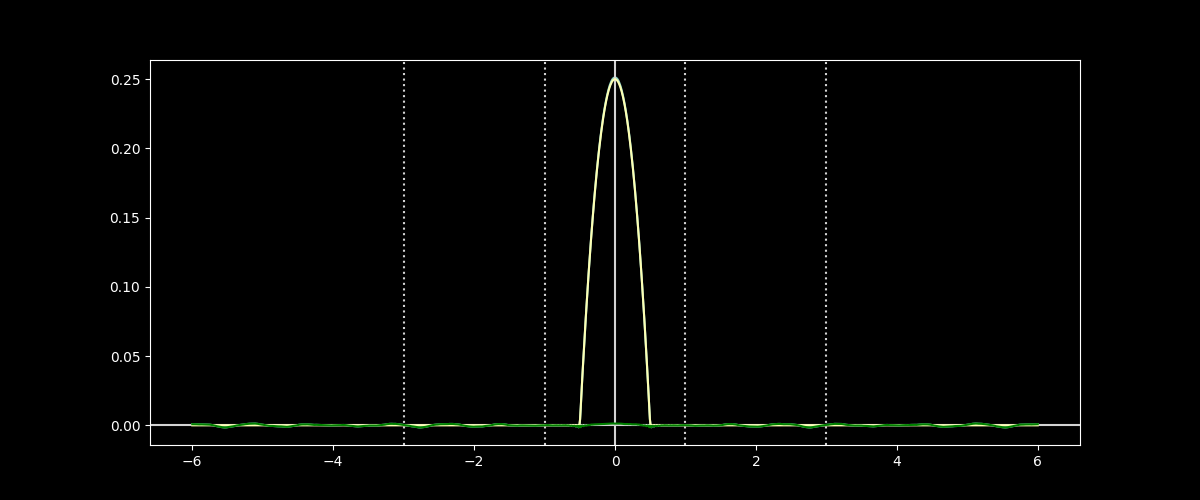

In [66]:
A.plot_field_1d(full, xs=xs, part='real');
A.add_1d_plot(plt.gca(), f0, xs=xs)
A.add_1d_plot(plt.gca(), diff, xs=xs, color='g')

## Slice along Z axis

In [67]:
portion = 'full'
slice_at = 0
constant_variable = 'x'

full_z = lambda x: sum([P.slice_propagate(x, portion=portion, slice_at=slice_at, constant_variable=constant_variable) for P in Ps])


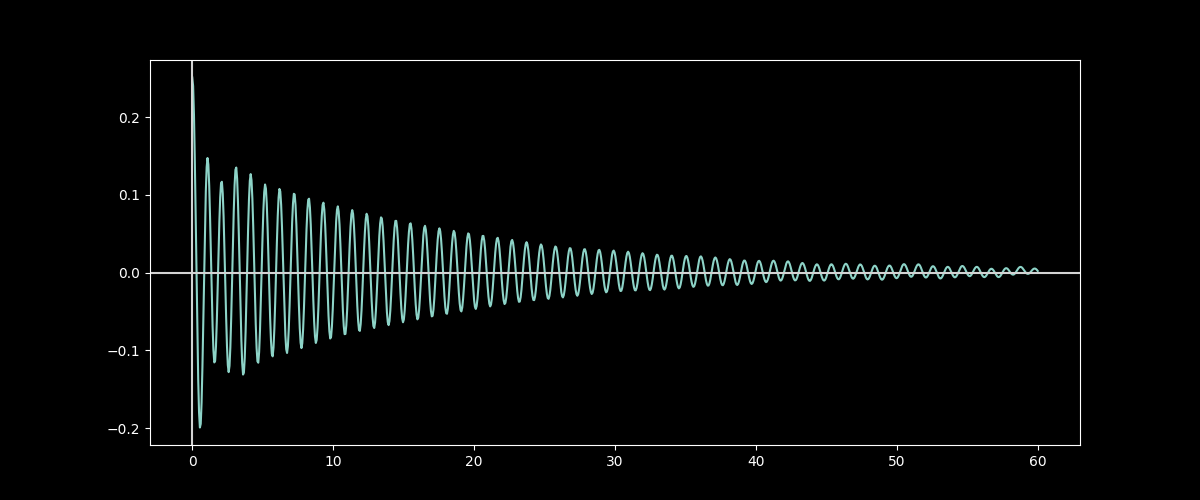

In [68]:
A.plot_field_1d(full_z, xs=np.linspace(0,60,1000), part='real', plot_Rhos=False);


## 2D Plots

In [69]:
xs = np.linspace(-15, 15, 1200)

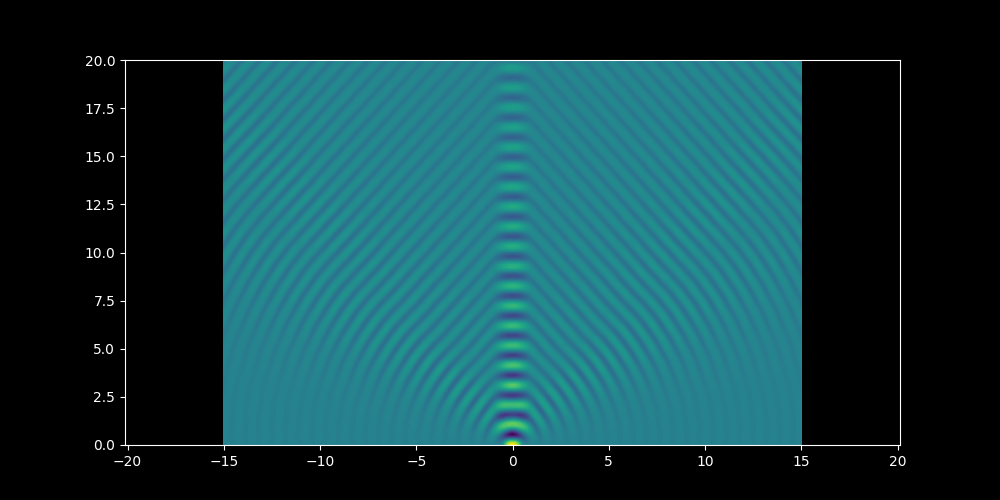

In [70]:
A.plot_field_2d(Full, xs=xs, zmin=0, zmax=20, zref=200, figsize=(10,5), colorbar=False)
plt.axis('equal');

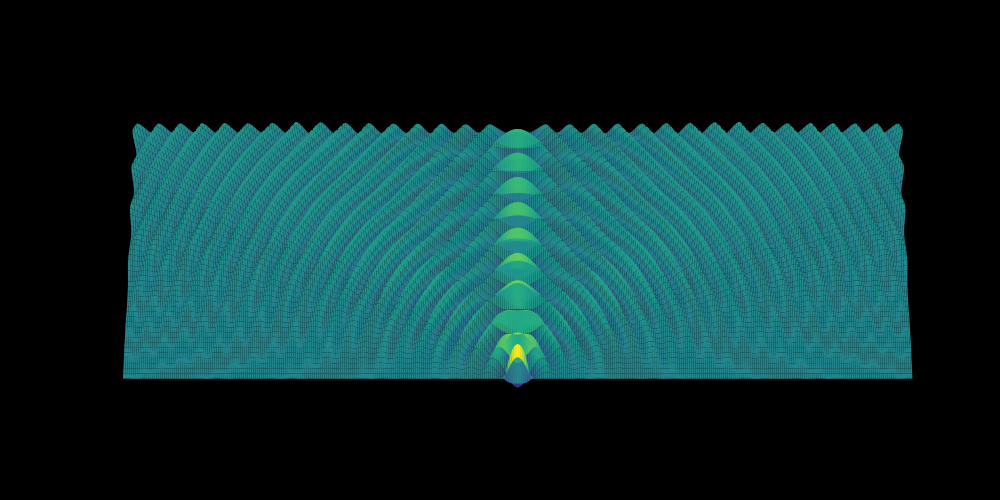

In [44]:
A.plot_field_2d(Full, surface=True, xs=xs, colorbar=False, zoom=2.5,
                azim=-90, elev=75, 
                zmax=10, zref=150,
                rstride=3, cstride=3)

## Compare to leaky mode

### Leaky mode coefficient

In [45]:
integrand = lambda x: P1.f0(x) * Fs1(x).conjugate()
alpha = quad(integrand, -1,1, complex_func=True)[0]
alpha

(0.3760763656953369+0.5849896599289792j)

Not clear how to normalize leaky modes though.

In [46]:
scale = .25/Fs1(0)

In [47]:
scale

array([0.02969895+0.04810642j])

In [48]:
Leaky_Diff = lambda x,z: Full(x,z) - .6*scale * Fs1(x,z)
Scaled_leaky = lambda x, z: .6*scale * Fs1(x,z)
scaled_leaky = lambda x: .6*scale * Fs1(x)

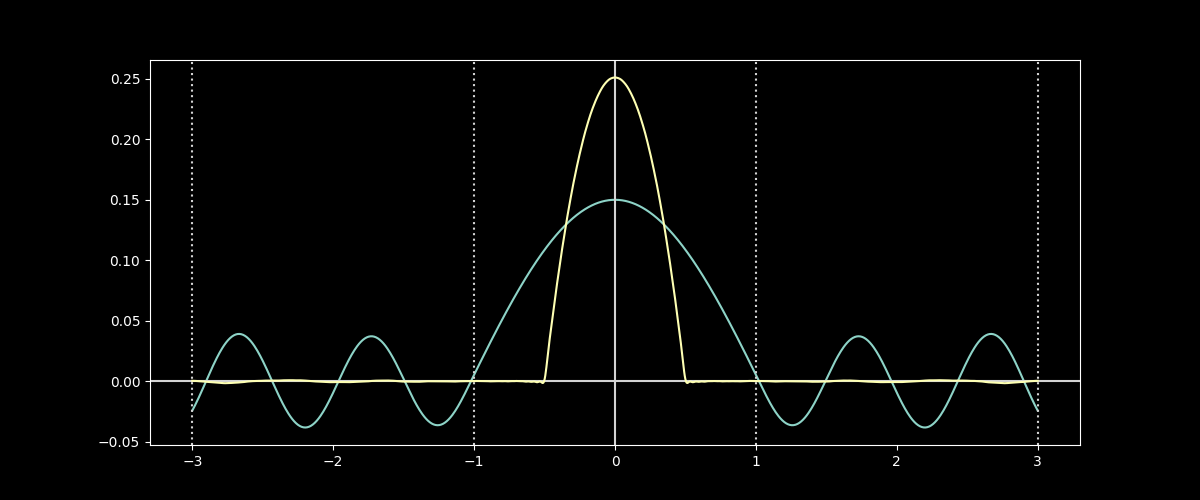

In [49]:
A.plot_field_1d(scaled_leaky);
A.add_1d_plot(plt.gca(), full)

In [50]:
leaky_z = lambda z: .6*scale*Fs1([0],z)


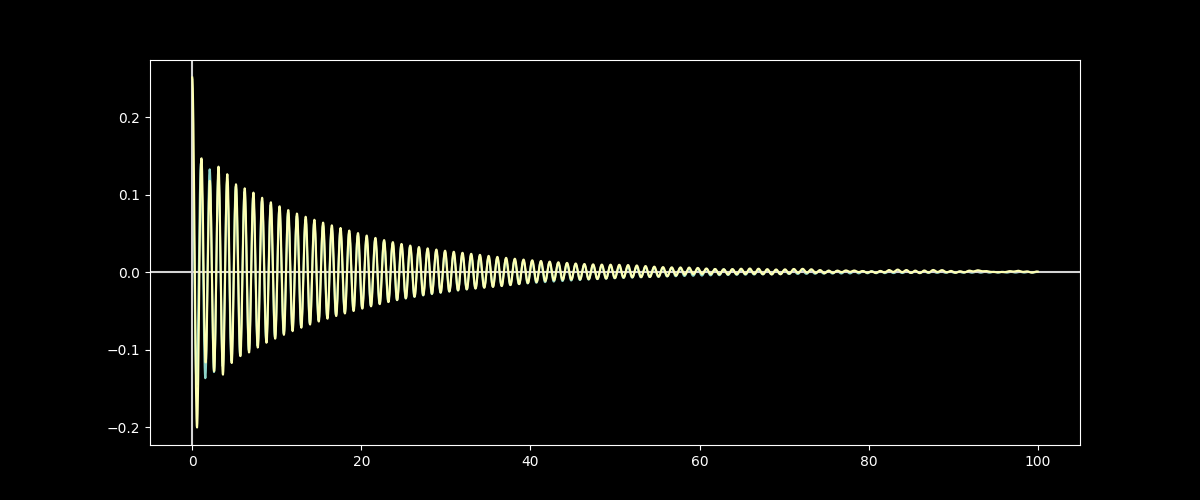

In [51]:
A.plot_field_1d(leaky_z, xs=np.linspace(0,100,3000), part='real', plot_Rhos=False);
A.add_1d_plot(plt.gca(), full_z, xs=np.linspace(0,100,3000), part='real');


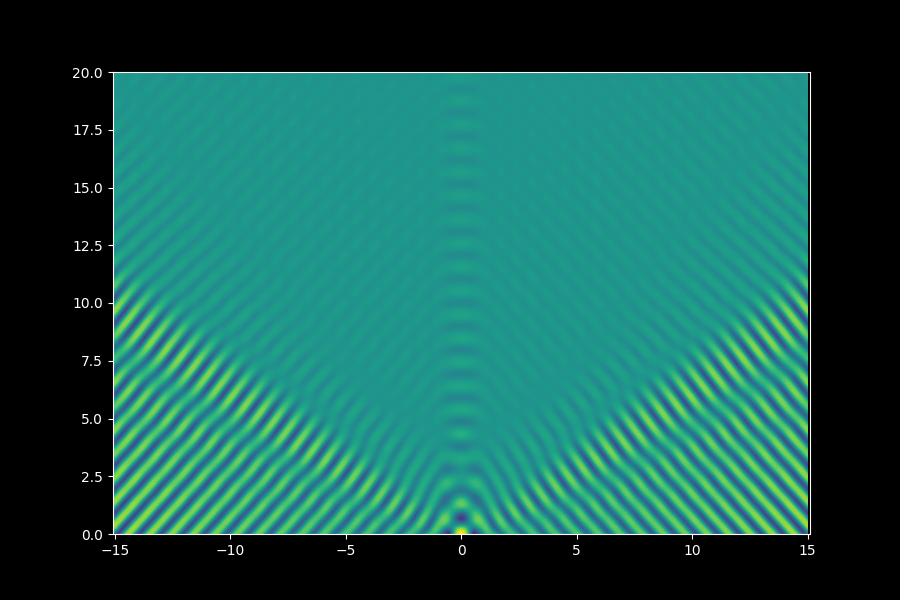

In [52]:
A.plot_field_2d(Leaky_Diff, xs=xs, zmin=0, zmax=20, zref=200, figsize=(9,6), colorbar=False)
plt.axis('equal');


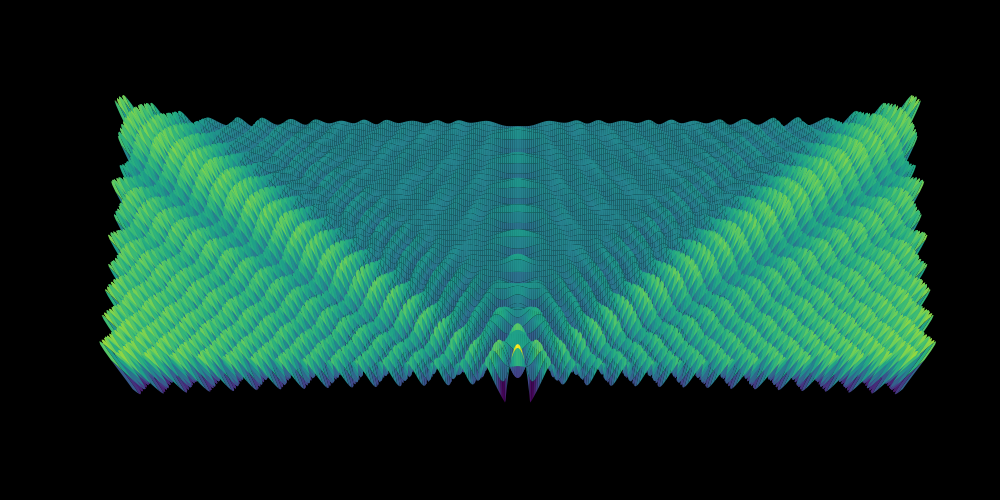

In [103]:
A.plot_field_2d(Leaky_Diff, surface=True, xs=xs, colorbar=False, zoom=2.5,
                azim=-90, elev=75, 
                zmax=10, zref=150,
                rstride=3, cstride=3)

## Save data for visualization

In [178]:
propfuncs = [P1, P2, P3]
evfuncs = [P4, P5, P6, P7, P8]

In [179]:
Prop = lambda x, z: sum([f.propagate(x, zs=z) for f in propfuncs])
Ev = lambda x, z: sum([f.propagate(x, zs=z) for f in evfuncs]) 
Full = lambda x, z: Prop(x, z) + Ev(x, z)

In [195]:
xs = np.linspace(-15, 15, 1200)
zs = np.linspace(0, 20, 600)


In [196]:
f0s = f0(xs)

In [197]:
rad_ys_propagating = Prop(xs, zs)

In [198]:
rad_ys_evanescent = Ev(xs, zs)


In [199]:
Xs, Zs = np.meshgrid(xs, zs)

In [200]:
def get_trig_indices(mesh_array):
    '''Get triangle index list for three js mesh formation via indexed buffer geometry.'''
    if len(mesh_array.shape) <= 1:
        raise ValueError('Provide meshgrid array as input.')
    Nz, Nx = mesh_array.shape[0], mesh_array.shape[1]
    l_inds = Nx * Nz
    indices =  np.arange(0, l_inds).reshape((Nx, Nz)).T  # Note transpose
    fbases = indices[:Nz-1, :Nx-1].T.flatten()  # Note transpose and index switch due to transpose
    f1 = np.array([[i, i+Nz, i+1] for i in fbases], dtype=int)
    f2 = np.array([[i+1, i+Nz, i+Nz+1] for i in fbases], dtype=int)
    return np.concatenate((f1, f2))


def get_base_vertices(Xs, Zs):
    '''Get vertices of triangles with zero height (y component in three.js).'''
    if Xs.shape != Zs.shape:
        raise ValueError('Provide meshgrid arrays (ie Xs, Zs = np.meshgrid(xs,zs)) as inputs.')
    Base = np.array([Xs, np.zeros_like(Xs), Zs], dtype=float)
    L = Xs.shape[0] * Xs.shape[1]
    base_vertices = Base.T.reshape((L,3))
    return base_vertices


def create_height_array_from_complex(ys, Xs):
    '''Get data for height from complex ys input (needs to be formatted as list:
        [ys[0].real, ys[0].imag, ys[1].real, ys[1].imag, ... ].'''
    L = Xs.shape[0] * Xs.shape[1]
    Ys = np.array([ys.real, ys.imag], dtype=float)
    heights = Ys.T.reshape((L,2))
    return heights


def save_trig_indices_as_json(filepath, mesh_array):
    indices = get_trig_indices(mesh_array)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(indices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)


def save_base_vertices_as_json(filepath, Xs, Zs):
    base_vertices = get_base_vertices(Xs, Zs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(base_vertices.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)
        

def save_heights_as_json(filepath, ys, Xs):
    heights= create_height_array_from_complex(ys, Xs)
    with open(filepath + '.json', 'w') as outfile:
        json.dump(heights.flatten().tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)

def save_values_as_json(filepath, f0s):
    with open(filepath + '.json', 'w') as outfile:
        json.dump(f0s.tolist(), outfile, separators=(',', ':'),
                  sort_keys=True, indent=4)




In [201]:
prefix='/home/pv/local/slab/apps/antiguide/'

In [202]:
save_trig_indices_as_json(prefix + 'trig_indices_new', Xs)


In [203]:
save_base_vertices_as_json(prefix + 'base_vertices_new', Xs, Zs)


In [204]:
save_heights_as_json(prefix + 'evanescent_heights', rad_ys_evanescent, Xs)


In [205]:
save_heights_as_json(prefix + 'propagating_heights', rad_ys_propagating, Xs)


In [206]:
save_values_as_json(prefix + 'f0s', f0s)


In [207]:
save_values_as_json(prefix + 'x0s', xs)


### Animation of input field

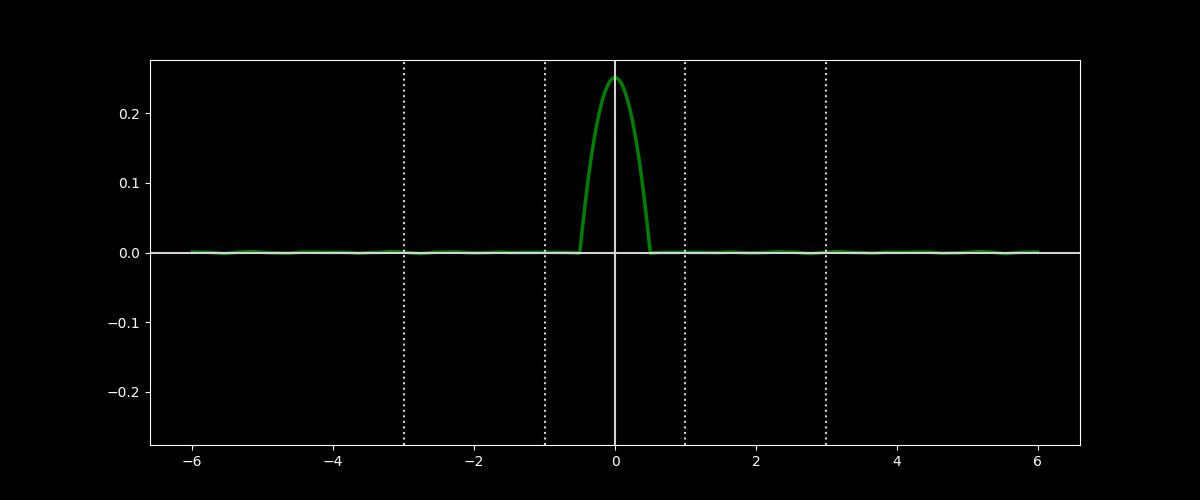

In [134]:
A.animate_field_1d(full, 'slice', xs=xs, linewidth=2.5, color='green')

In [135]:
from IPython.display import HTML


HTML("""
<video alt="test" controls id="theVideo">
        <source src="slice.mp4" type="video/mp4">
</video>

<script>
video = document.getElementById("theVideo")
video.playbackRate = 1;
</script>
""")